In [22]:
import pandas as pd
loc23= pd.read_csv('23-17.01.29-02.04.csv')
print(loc23)

     Unnamed: 0   Unnamed: 1                   Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                          NaN        NaN   
1           NaN     SITE NO:  23 - Nth Meadow Walk East 2        NaN   
2           NaN        Date:                     29/01/17        NaN   
3           NaN   Direction:                                     NaN   
4           NaN          NaN                          NaN        NaN   
5           NaN         Hour                          P/C    P/C Kph   
6           NaN  00.00-00.59                            0          0   
7           NaN  01.00-01.59                            0          0   
8           NaN  02.00-02.59                            1         14   
9           NaN  03.00-03.59                            1         14   
10          NaN  04.00-04.59                            0          0   
11          NaN  05.00-05.59                            0          0   
12          NaN  06.00-06.59                            0       

In [23]:
loc23 = loc23.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Nth Meadow Walk East 2 - DAILY FLOW BY HOUR')
loc23.drop(loc23.index[[0,1,2,3,4,5]], inplace=True)
loc23.drop(loc23.columns[[0,5]], axis=1, inplace=True)
loc23.index = loc23.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc23.rename(columns=newcols, inplace=True)
loc23

Nth Meadow Walk East 2 - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,5
1,01.00-01.59,0,0,8
2,02.00-02.59,1,14,5
3,03.00-03.59,1,14,5
4,04.00-04.59,0,0,1
5,05.00-05.59,0,0,0
6,06.00-06.59,0,0,0
7,07.00-07.59,0,0,0
8,08.00-08.59,1,16,1
9,09.00-09.59,3,9,4


In [24]:
loc23['Hourstarts'] = loc23.Hour.str.split('-').str.get(0)
loc23['Hourends'] = loc23.Hour.str.split('-').str.get(1)
loc23.drop(loc23.columns[0], axis=1, inplace=True)

In [4]:
loc23.to_csv('Loc23.csv')
loc23 = loc23.dropna(how='all')
loc23 = loc23[loc23.Hourstarts != "Direction:"]
loc23 = loc23[loc23.Hourstarts != "Total"]
loc23 = loc23[loc23.Hourstarts != "Hour"]
loc23 = loc23[loc23.Hourstarts != "Date:"]

In [5]:
pd.options.mode.chained_assignment = None

In [7]:
loc23[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc23[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [8]:
loc23day1 = loc23.iloc[0:24]
loc23day2 = loc23.iloc[24:48]
loc23day3 = loc23.iloc[48:72]
loc23day4 = loc23.iloc[72:96]
loc23day5 = loc23.iloc[96:120]
loc23day6 = loc23.iloc[120:144]
loc23day7 = loc23.iloc[144:168]
#my data is divided into 7 clean sets

In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

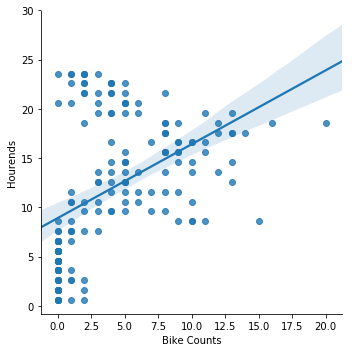

In [10]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23)

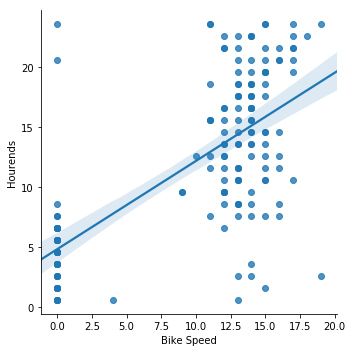

In [12]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23)

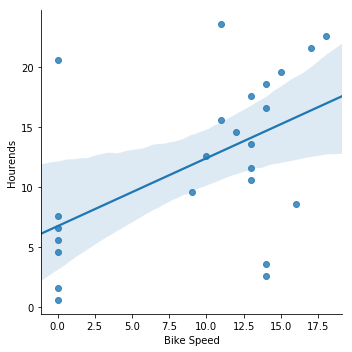

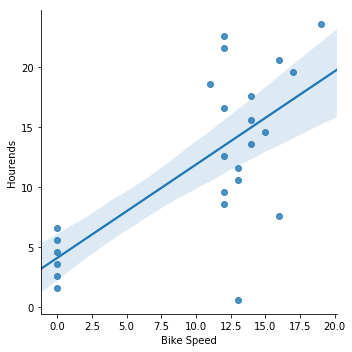

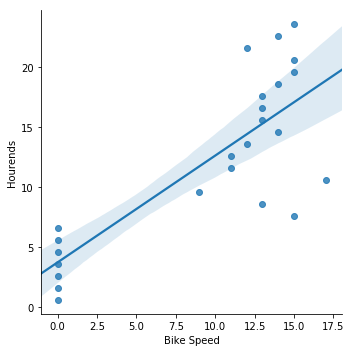

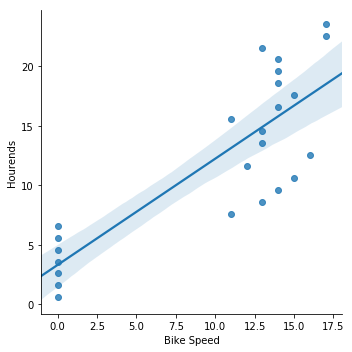

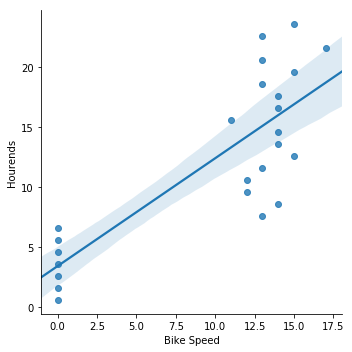

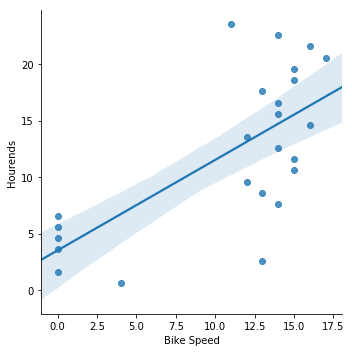

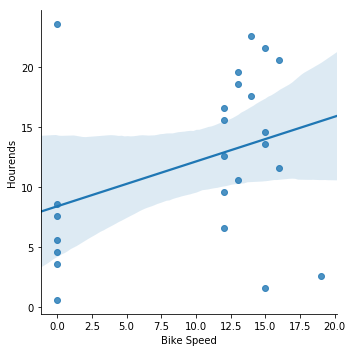

In [13]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc23day7)

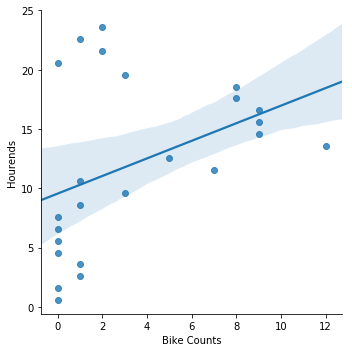

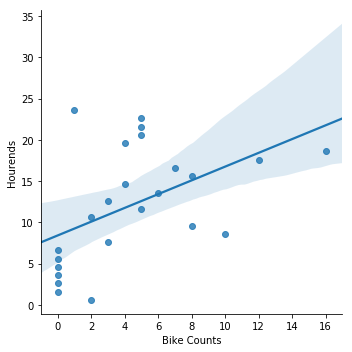

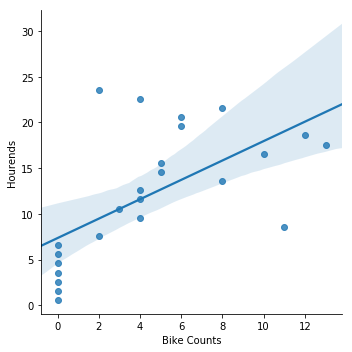

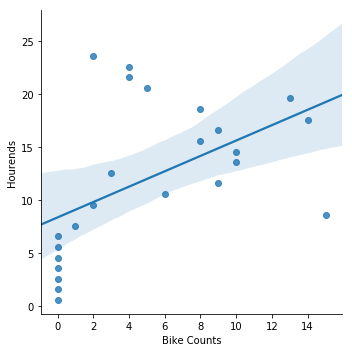

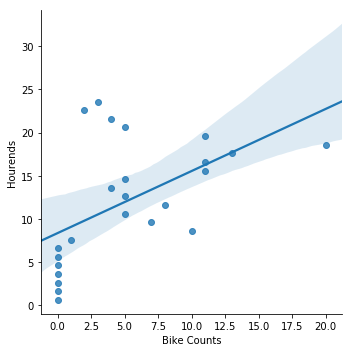

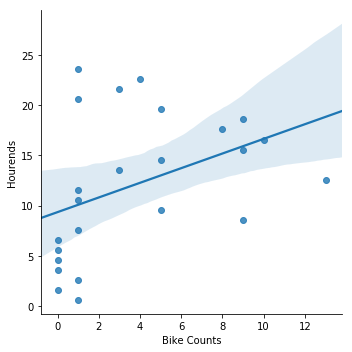

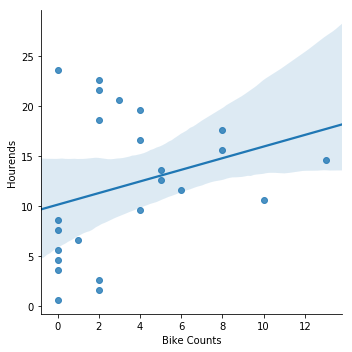

In [14]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc23day7)